In [1]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Wrangle Data

In [2]:
# Load features and target datasets

df_features = pd.read_csv('train_features.csv', index_col=0)
df_targets = pd.read_csv('train_targets_scored.csv', index_col=0)

# Print the shapes
df_features.shape, df_targets.shape

((23814, 875), (23814, 206))

In [3]:
# Take a look at the df_features
df_features.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


**Takeaways**
- Drop the categorical variables. (A common misake new data scientists make is to apply PCA to non-continous variables.)
- Scale the continuous variables by StandardScaler

In [4]:
# Drop the categoricals
df_features.drop(columns=['cp_type', 'cp_time', 'cp_dose'], inplace=True)
df_features.shape # 872 features left

(23814, 872)

In [5]:
# Scale the features so each feature has unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Print the data type of X_scaled
type(X_scaled) # the scaler returns a np.array

numpy.ndarray

In [6]:
# Length of the array should match the number of observations
len(X_scaled) # 23814, matched

23814

In [7]:
# The length of every member in the array shoulb math the number of the features
len(X_scaled[0]) # 872, matched

872

In [8]:
# Check the mean of the scaled dataset
X_scaled.mean(axis=0) # checked: the scaled data have a mean of ~0

array([-8.95115565e-18,  2.02892861e-17,  2.83453262e-17, -6.86255267e-18,
       -4.77394968e-18,  3.58046226e-18, -7.16092452e-18, -5.66906525e-18,
        1.43218490e-17,  2.98371855e-19, -5.96743710e-18,  5.96743710e-18,
       -3.28209041e-18,  7.16092452e-18,  2.74502107e-17,  1.07413868e-17,
       -1.79023113e-18, -1.31283616e-17, -6.56418081e-18,  2.50632358e-17,
        1.79023113e-17, -1.25316179e-17, -6.86255267e-18,  7.16092452e-18,
       -1.49185928e-18, -4.17720597e-18,  1.49185928e-18,  2.32730047e-17,
        9.54789936e-18, -5.96743710e-19,  2.98371855e-18,  4.35622908e-17,
       -1.19348742e-17, -7.75766823e-18,  1.67088239e-17,  6.26580896e-18,
        2.68534670e-18, -2.02892861e-17, -1.25316179e-17, -1.31283616e-17,
        1.90957987e-17, -5.96743710e-18, -1.43218490e-17, -4.17720597e-18,
        2.08860299e-18, -8.05604009e-18, -1.07413868e-17,  2.98371855e-18,
        8.95115565e-18, -4.47557783e-18,  2.02892861e-17, -3.87883412e-18,
        3.28209041e-18,  

In [9]:
# Checkt the variance of the scaled dataset
X_scaled.var(axis=0) # Checked: should be 1 from begining to the end

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Principal Component Analysis

In [20]:
# Create a PCA object
pca = PCA(n_components=10)
pca

PCA(n_components=10)

In [21]:
# Fit the scaled data
pca = pca.fit(X_scaled)
pca

PCA(n_components=10)

In [22]:
# Transform the scaled data
X_pca = pca.transform(X_scaled)

# Check the shape of X_pca
X_pca.shape

(23814, 10)

In [23]:
# Measure the variance ratio of the principal components
ex_var = np.var(X_pca, axis=0)
ex_var_ratio = ex_var / np.sum(ex_var)
ex_var_ratio

array([0.58879449, 0.08198711, 0.06588148, 0.0596171 , 0.04347552,
       0.04250804, 0.03543913, 0.03372976, 0.02577805, 0.02278931])

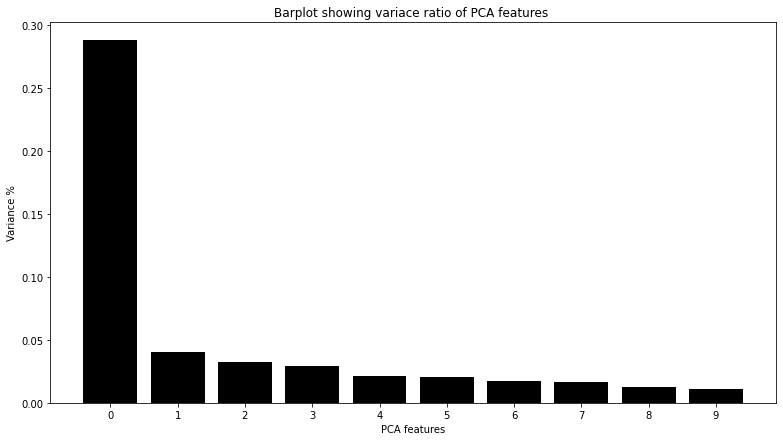

In [24]:
pca_features = range(pca.n_components_)

plt.figure(figsize=(13,7))
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(pca_features)
plt.title('Barplot showing variace ratio of PCA features ')

plt.bar(pca_features, pca.explained_variance_ratio_, color='black')

plt.show()

### Data Visualization by PCA

In [25]:
# Convert the X_pca to dataframe
df_pca = pd.DataFrame(X_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9
0,-7.107215,-1.165196,-0.308750,7.710262,-4.207802,-2.881928,2.211973,3.728921,-2.244121,-1.575238
1,-6.362689,3.711719,7.181210,-4.382651,3.710637,3.305070,1.691323,0.008099,0.146325,1.231591
2,-1.732367,2.389964,-3.211008,-5.197653,0.389134,-1.007917,1.544630,-2.844652,0.262411,-3.747477
3,9.183280,-2.753483,-5.091478,-8.611177,-4.972107,-6.353016,1.786426,-6.916380,-0.724537,4.024447
4,-6.472501,1.016573,4.138737,-8.496884,-3.038397,-2.307629,-0.922348,0.420227,6.737564,4.577188
...,...,...,...,...,...,...,...,...,...,...
23809,-5.213466,2.287643,-2.027770,-2.810259,0.193226,-0.095639,0.878964,-0.767267,-2.589549,-1.310772
23810,-4.162142,-0.611263,-1.944464,1.573128,-3.049775,2.006902,-1.270065,-1.469549,1.186392,0.016968
23811,-6.319414,-1.133699,-0.133855,0.454233,0.445667,-1.460451,2.518906,0.523646,0.965276,-0.272601
23812,0.543592,-16.571763,5.914449,7.978580,6.317018,-3.128424,2.904587,6.197154,-7.045710,6.498872


In [26]:
# Take the target from the matrix
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
c_inhibitor.sum()

435

In [27]:
# Concat the target columns
df_pca['target'] = c_inhibitor.values
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,target
0,-7.107215,-1.165196,-0.308750,7.710262,-4.207802,-2.881928,2.211973,3.728921,-2.244121,-1.575238,0
1,-6.362689,3.711719,7.181210,-4.382651,3.710637,3.305070,1.691323,0.008099,0.146325,1.231591,0
2,-1.732367,2.389964,-3.211008,-5.197653,0.389134,-1.007917,1.544630,-2.844652,0.262411,-3.747477,0
3,9.183280,-2.753483,-5.091478,-8.611177,-4.972107,-6.353016,1.786426,-6.916380,-0.724537,4.024447,0
4,-6.472501,1.016573,4.138737,-8.496884,-3.038397,-2.307629,-0.922348,0.420227,6.737564,4.577188,0


In [28]:
# Check the count of the target
df_pca.target.sum() # matched, 435

435

In [29]:
# Map the target values to names
df_pca.target = df_pca.target.map({0: 'negative', 1:'positive'})
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,target
0,-7.107215,-1.165196,-0.308750,7.710262,-4.207802,-2.881928,2.211973,3.728921,-2.244121,-1.575238,negative
1,-6.362689,3.711719,7.181210,-4.382651,3.710637,3.305070,1.691323,0.008099,0.146325,1.231591,negative
2,-1.732367,2.389964,-3.211008,-5.197653,0.389134,-1.007917,1.544630,-2.844652,0.262411,-3.747477,negative
3,9.183280,-2.753483,-5.091478,-8.611177,-4.972107,-6.353016,1.786426,-6.916380,-0.724537,4.024447,negative
4,-6.472501,1.016573,4.138737,-8.496884,-3.038397,-2.307629,-0.922348,0.420227,6.737564,4.577188,negative


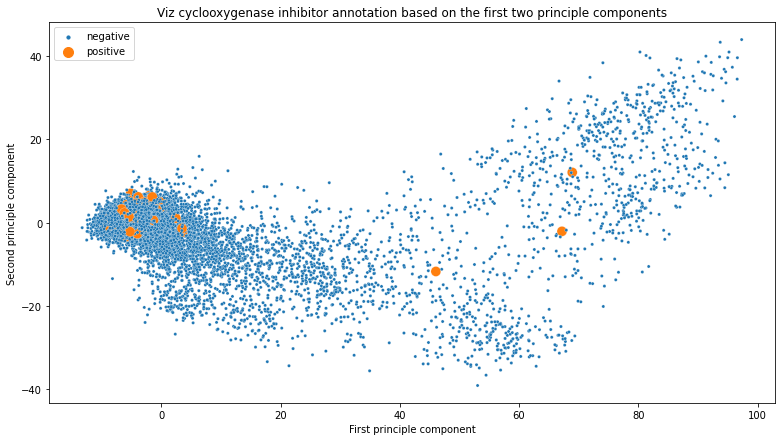

In [31]:
# Viz

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_pca, x=df_pca[0], y=df_pca[1], hue='target', size='target', sizes=(100, 10))
plt.title('Viz cyclooxygenase inhibitor annotation based on the first two principle components')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

 **Results&Conclusion**
- The variance drops after the first component.
- The data is really imbalanced.
- The positive and negative labels are not seperated very well with the first 2 principle components are new features.
- The positive labels are buried in the negative labels.
- Despite of the classes, the observations seems to form 3~4 clusters, wich is worth of further exploring. 

### Incremental PCA
- The incremental principal component analysis is a variant of the PCA.
- It only keeps the most significant singular vectors to project the data into a space to reduced size.

In [10]:
# Import the library
from sklearn.decomposition import IncrementalPCA

In [11]:
# Create the object

inc_pca = IncrementalPCA(n_components=10)
inc_pca

IncrementalPCA(n_components=10)

In [12]:
# Fit the scaled data

inc_pca = inc_pca.fit(X_scaled)
inc_pca

IncrementalPCA(n_components=10)

In [14]:
# Transform the scaled data
X_inc_pca = inc_pca.transform(X_scaled)

# Print the shape
X_inc_pca.shape

(23814, 10)

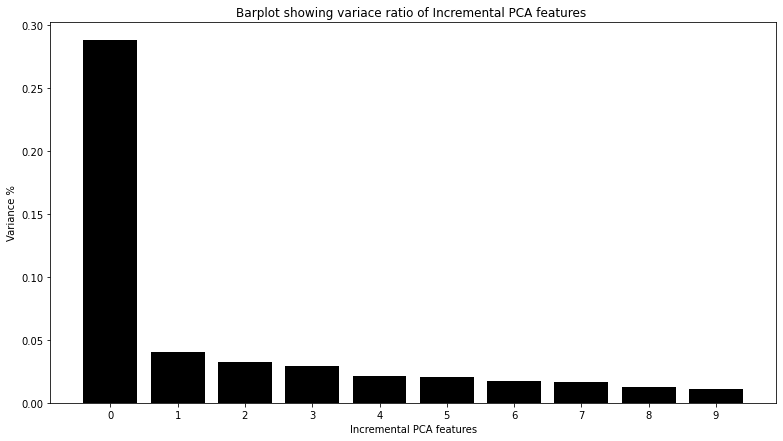

In [17]:
inc_pca_features = range(inc_pca.n_components_)

plt.figure(figsize=(13,7))
plt.xlabel('Incremental PCA features')
plt.ylabel('Variance %')
plt.xticks(inc_pca_features)
plt.title('Barplot showing variace ratio of Incremental PCA features ')

plt.bar(inc_pca_features, inc_pca.explained_variance_ratio_, color='black')

plt.show()

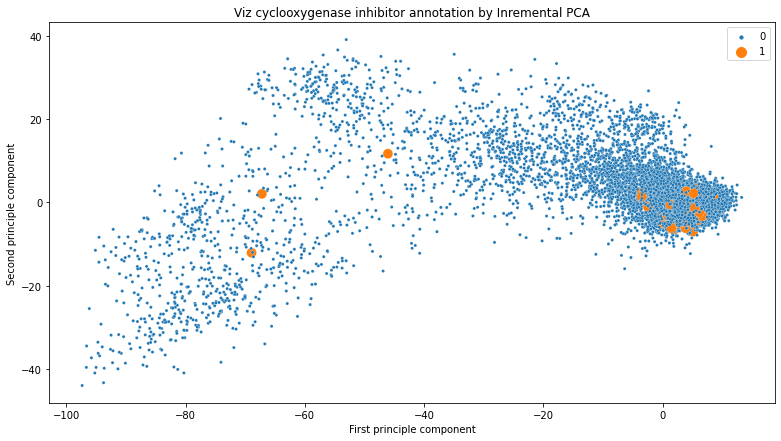

In [53]:
# Data Visualization

df_inc_pca = pd.DataFrame(X_inc_pca)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_inc_pca['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_inc_pca, x=df_inc_pca[0], y=df_inc_pca[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Inremental PCA')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Kernel PCA
- KPCA makeing it possible to perform complex nonlinear projectiosn for dimensionality reduction
- Here, I perform kPCA with an RBF kernel.

In [38]:
# Import library
from sklearn.decomposition import KernelPCA

# Create the object
kpca = KernelPCA(n_components=10, kernel='rbf')

# Print the object
kpca

KernelPCA(kernel='rbf', n_components=10)

In [39]:
# Fit and transform the scaled data
X_kpca = kpca.fit_transform(X_scaled) # Took 22 mins

# Print the shape
X_kpca.shape

(23814, 10)

In [45]:
# Print attributes
kpca.lambdas_

array([1073.51645672,  400.7973264 ,  342.95753182,  266.52206607,
        168.15217308,  141.37467194,  115.98452905,  109.52666729,
         91.42631596,   83.69487509])

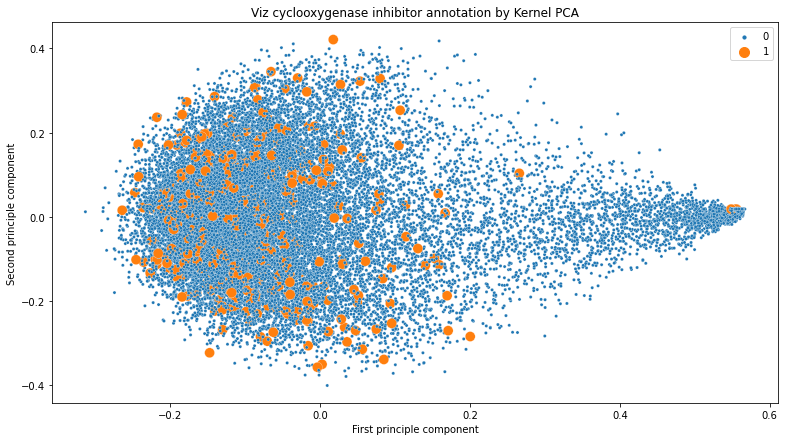

In [52]:
# Data Visualization

df_kpca = pd.DataFrame(X_kpca)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_kpca['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_kpca, x=df_kpca[0], y=df_kpca[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Kernel PCA')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Sparse PCA

In [47]:
# Import library
from sklearn.decomposition import SparsePCA

# Create the object
spca = SparsePCA(n_components=10, alpha=1) 

# Sparsity controlling parameter. Higher values lead to sparser components.

# Print the object
spca

SparsePCA(n_components=10)

In [48]:
# Fit and transform the scaled data
X_spca = spca.fit_transform(X_scaled) # Took 25 mins

# Print the shape
X_spca.shape

(23814, 10)

In [50]:
# Print the attributes

print(spca.n_components_)

10


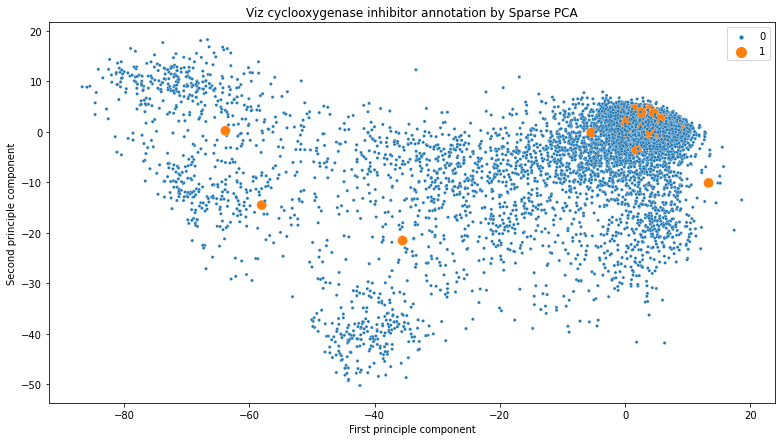

In [51]:
# Data Visualization

df_spca = pd.DataFrame(X_spca)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_spca['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_spca, x=df_spca[0], y=df_spca[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Sparse PCA')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Singular Value Decomosition (SVD)

In [12]:
# Import library
from sklearn.decomposition import TruncatedSVD

# Create the object
tSVD = TruncatedSVD(n_components=10, algorithm='randomized')

# Print the object
tSVD

TruncatedSVD(n_components=10)

In [13]:
# Fit and transform the scaled data
X_tsvd = tSVD.fit_transform(X_scaled)

# Print the shape
X_tsvd.shape

(23814, 10)

In [16]:
# Print the attributes

print(tSVD.explained_variance_ratio_)

[0.28790915 0.04009012 0.03221477 0.02915161 0.02125869 0.02078561
 0.01732905 0.01649318 0.01260486 0.01114257]


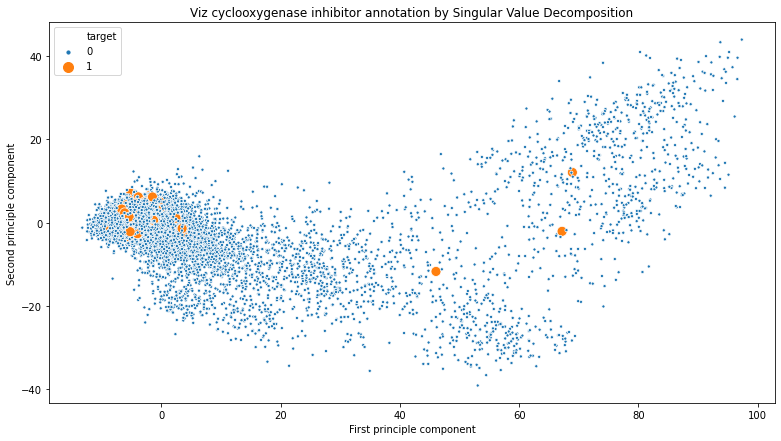

In [18]:
# Data Visualization

df_tSVD = pd.DataFrame(X_tsvd)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_tSVD['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_tSVD, x=df_tSVD[0], y=df_tSVD[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Singular Value Decomposition')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Gaussian Random Projection (GRP)

In [19]:
# Import library
from sklearn.random_projection import GaussianRandomProjection

# Create the object
grp = GaussianRandomProjection(n_components=10, random_state=123)

# Print the object
grp

GaussianRandomProjection(n_components=10, random_state=123)

In [20]:
# Fit and transform the scaled data
X_grp = grp.fit_transform(X_scaled)

# Print the shape
X_grp.shape

(23814, 10)

In [21]:
# Print the attributes
grp.n_components_

10

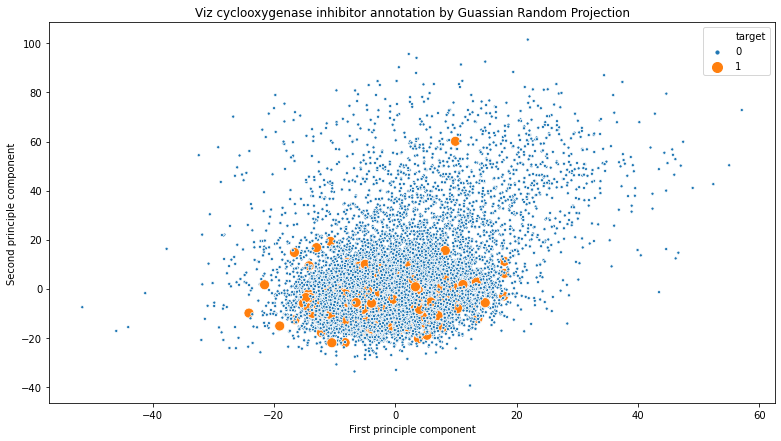

In [22]:
# Data Visualization

df_grp = pd.DataFrame(X_grp)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_grp['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_grp, x=df_grp[0], y=df_grp[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Guassian Random Projection')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Sparse Random Projection (SRP)

In [23]:
# Import the library
from sklearn.random_projection import SparseRandomProjection

# Create the object
srp = SparseRandomProjection(n_components = 10, random_state=123)

# Print the object
srp

SparseRandomProjection(n_components=10, random_state=123)

In [24]:
# Fit and transform the scaled data
X_srp = srp.fit_transform(X_scaled)

# Print the shape
X_srp.shape

(23814, 10)

In [25]:
# Print the attributes

print(srp.n_components_)
print(srp.density_)

10
0.03386427307392982


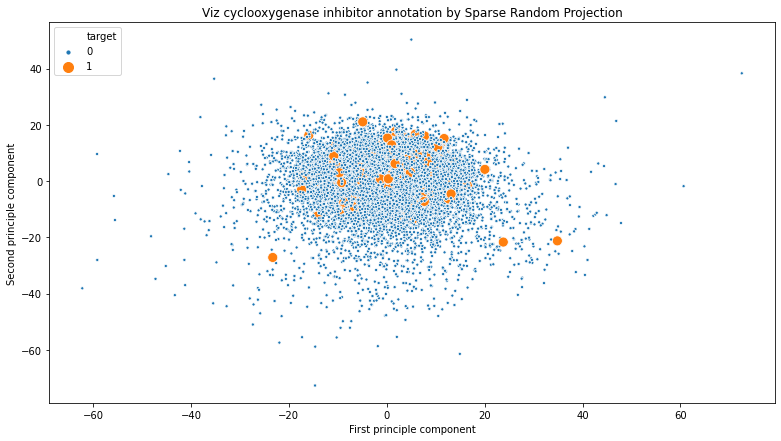

In [26]:
# Data Visualization

df_srp = pd.DataFrame(X_srp)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_srp['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_srp, x=df_srp[0], y=df_srp[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Sparse Random Projection')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### MultiDimentionsal Scaling (MDS)

In [27]:
# Import library
from sklearn.manifold import MDS

# Create the object
mds = MDS(n_components=10, metric=True, random_state=123)

# Print the object
mds

MDS(n_components=10, random_state=123)

In [ ]:
# # Fit and transform the scaled data
# X_mds = mds.fit_transform(X_scaled)

# # Print the shape
# X_mds.shape

**Quick Notes**: It ran about 4 hours and the computer crashed. 

### ISOMAP
- It is a **nonlinear dimentionality reduction method** based on spectral theory that attemps to preserve geodetic distances in the lower dimension.
- Non-linear dimensionality reduction through Isometric Mapping.

In [12]:
# Impor the library
from sklearn.manifold import Isomap

# Create the object
isomap = Isomap(n_components=5, n_neighbors=3)

# Print the object
isomap

Isomap(n_components=5, n_neighbors=3)

In [13]:
# Fit and transform the scaled data
X_isomap = isomap.fit_transform(X_scaled)

# Print the shape
X_isomap.shape

(23814, 5)

**Quick Notes**: 
- Hyperparameter: n_components=10, n_neighbors=5
    - Ran 1 hour and unable to allocate 4.23 GiB for an array with shape (23814, 23814) and data type float64
- Hypterparameter: n_components=5, n_neighbors=3
    - went through, took about 1-2 hours

In [19]:
# Print the attributes

print(isomap.embedding_.shape)
print(isomap.kernel_pca_)
print(isomap.nbrs_)

(23814, 5)
KernelPCA(kernel='precomputed', n_components=5)
NearestNeighbors(n_neighbors=3)


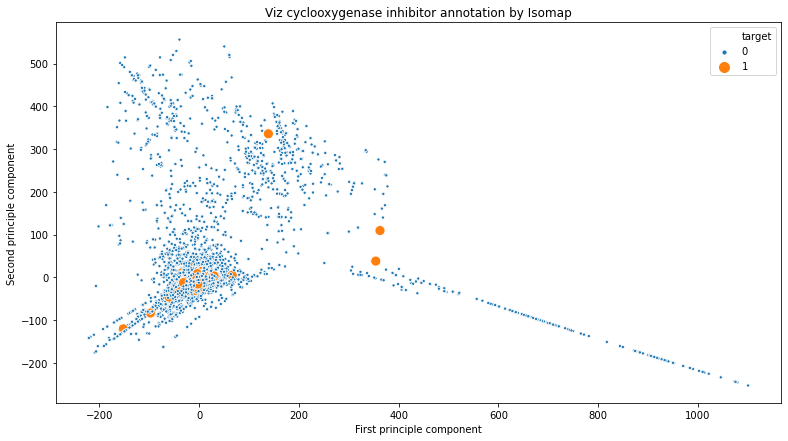

In [17]:
# Data Visualization

df_isomap = pd.DataFrame(X_isomap)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_isomap['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_isomap, x=df_isomap[0], y=df_isomap[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Isomap')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### MiniBatch Dictionary Learning
- Dictionary-based learning

In [20]:
# Import the library
from sklearn.decomposition import MiniBatchDictionaryLearning

# Create the object
mini = MiniBatchDictionaryLearning(n_components=10, alpha=1, random_state=123)

# Print the object
mini

MiniBatchDictionaryLearning(n_components=10, random_state=123)

In [21]:
# Fit and transform the scaled data
X_mini = mini.fit_transform(X_scaled)

# Print the shape
X_mini.shape

(23814, 10)

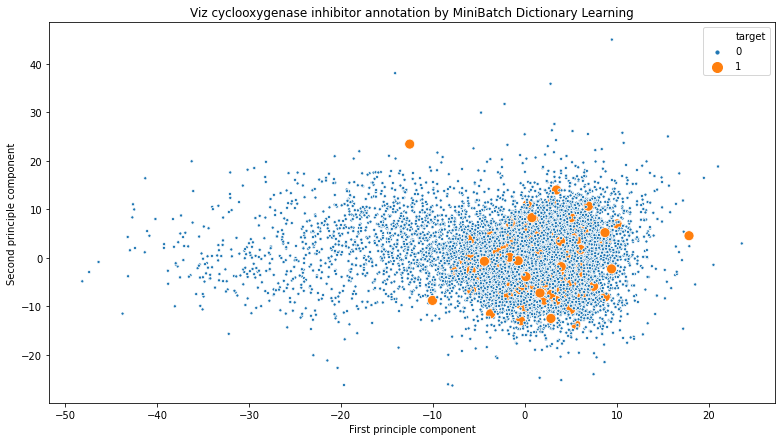

In [23]:
# Data Visualization

df_mini = pd.DataFrame(X_mini)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_mini['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_mini, x=df_mini[0], y=df_mini[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by MiniBatch Dictionary Learning')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Independent Composent Analysis (ICA)
- A method primarily used for signal processing to linearly separate mixed data.

In [24]:
# Import the library
from sklearn.decomposition import FastICA

# Create the object
ica = FastICA(n_components=10, algorithm='parallel', whiten=True, random_state=123)

# Print the object
ica

FastICA(n_components=10, random_state=123)

In [25]:
# Fit and transform the scaled data
X_ica = ica.fit_transform(X_scaled)

# Print the shape
X_ica.shape

(23814, 10)

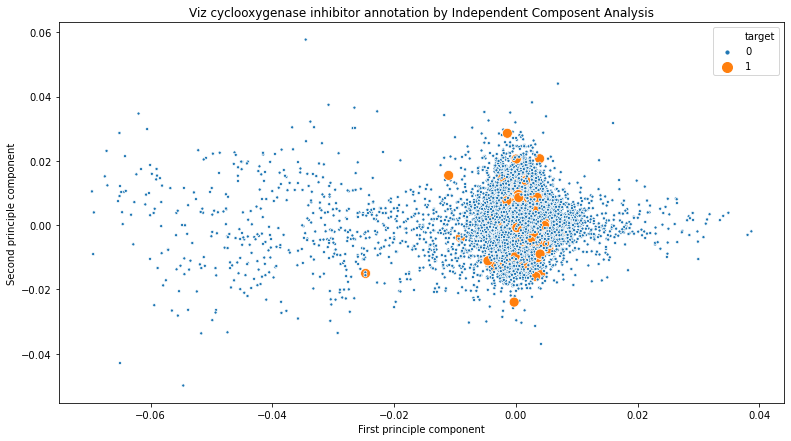

In [26]:
# Data Visualization

df_ica = pd.DataFrame(X_ica)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_ica['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_ica, x=df_ica[0], y=df_ica[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by Independent Composent Analysis')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### T-distributed Stochastic Neighbor Embedding (T-SNE)
- T-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

In [28]:
# Import the library
from sklearn.manifold import TSNE

# Create the subject
tsne = TSNE(n_components=2, random_state=123)

# Print the object
tsne

TSNE(random_state=123)

In [29]:
# Fit and transform the scaled data
X_tsne = tsne.fit_transform(X_scaled) # Took 18 mins

# Print the shape
X_tsne.shape

(23814, 2)

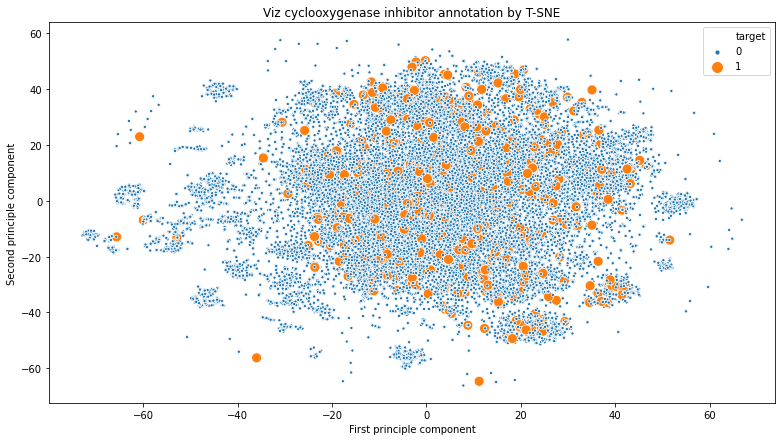

In [30]:
# Data Visualization

df_tsne = pd.DataFrame(X_tsne)
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
df_tsne['target'] = c_inhibitor.values

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], 
                hue='target', size='target', sizes=(100, 10))

plt.title('Viz cyclooxygenase inhibitor annotation by T-SNE')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

### Locally Linear Embedding (LLE)
- Locally linear embedding seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. 
- LLE works by first measuring how each training instance linearly relates to its closest neighbors(c.n.), and then looking for a low dimensional representation of the training set where these local relationships are best preserved. 
- This makes it particularly good at unrolling twisted manifold, especially when there is not too much noise.

In [33]:
# Import the library
from sklearn.manifold import LocallyLinearEmbedding

# Create the object
lle = LocallyLinearEmbedding(n_neighbors=3, n_components=2, eigen_solver='dense', method='modified')

# Print the object
lle

LocallyLinearEmbedding(eigen_solver='dense', method='modified', n_neighbors=3)

In [ ]:
# Fit and transform the scaled data
X_lle = lle.fit_transform(X_scaled) 

# Print the shape
X_lle.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_locally_linear.py:449: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


**Quick Notes**: 
- Hyperparameter: eigen_solver = 'auto' (Took 18 mins)
    - ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that method='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.  method='dense' is recommended. See online documentation for more information.

- Hyperparameter: eigen_solver = 'dense' (Took 23 mins)